#Student Name: Aidan Keeshan
#Student ID:   18200117

In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

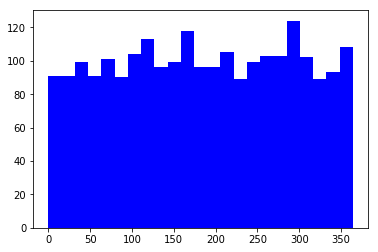

In [2]:
num_bins = 23
samples = np.random.randint(365, size=23*100)
plt.hist(samples, num_bins, facecolor='blue')
plt.show()

Problem statement:


Common example of real world probability is that if you have 23 people the odds are 50% two people will have the same birthday. Sometimes asked as the what is the minimum number of people required to have 50% chance that 2 share the same birthday. The response is not intuitive and wanted to validate for myself in this instance.


As taken from Wikipedia:
“In probability theory, the birthday problem or birthday paradox concerns the probability that, in a set of n randomly chosen people, some pair of them will have the same birthday. By the pigeonhole principle, the probability reaches 100% when the number of people reaches 367 (since there are only 366 possible birthdays, including February 29). However, 99.9% probability is reached with just 70 people, and 50% probability with 23 people. These conclusions are based on the assumption that each day of the year (excluding February 29) is equally probable for a birthday.”


I have run simulation over 100,1000,1000 to show this is looks to be correct.

The code can be updated to be more efficient and possible make better use of numpy. 


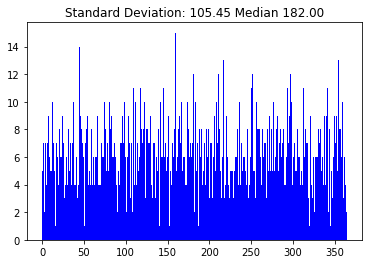

In [3]:
num_interations = 10000
num_samples = 23
num_bins = 365


birthdays = np.random.randint(365, size=(num_samples)*num_interations)

plt.title("Standard Deviation: {:.2f} Median {:.2f}".format(np.std(birthdays),np.median(birthdays)))
plt.hist(samples, num_bins, facecolor='blue')
plt.show()

Plot showing the distribution of the 10k iterations, standard deviation and mean.

In [4]:
import matplotlib.pyplot as plt
import timeit
plt.rcParams["figure.figsize"] = (20,10)

def test_same_birthday(sample_size):
    birthdays = np.random.randint(365, size=sample_size)
    birthday_duplicate = 1 if np.max(np.bincount(birthdays)) > 1 else 0
    
    return birthday_duplicate

def run_simulation_orig(num_iterations, sample_size):
    
    results = np.zeros((num_iterations, 3))
    cumulative_result = 0
    
    for i, row in enumerate(results):        
        # Get the test result and update the running total
        same_birthday_result = test_same_birthday(sample_size)
        cumulative_result += same_birthday_result
        
        # Update the results array
        row[0] = same_birthday_result
        row[1] = cumulative_result
        row[2] = cumulative_result / (i + 1)
        
    return results

def run_simulation_np(num_interations,num_samples):
    birthdays = np.random.randint(365, size=(num_samples)*num_interations)
    bdays = np.reshape(birthdays,((num_interations,num_samples)))
    results = np.zeros((num_interations,3))
    results[:,0] = np.arange(num_interations) + 1 
    results[:,1] = np.apply_along_axis(lambda x:np.max(np.bincount(x)),axis=1,arr=bdays)
    results[:,1] = np.where(results[:,1]>1,1,0)
    results[:,1] = np.cumsum(results[:,1])
    results[:,2] = results[:,1]/results[:,0]
    return results

def plot_cumulative_probability(sample_data, title, plt_color):
    plt.title(title)
    plt.ylim(0,1)
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cumulative observed Probability')
    plt.plot(range(len(sample_data)), sample_data[:,2], color=plt_color)
    plt.rcParams["figure.figsize"] = (20,10)
    plt.show()

def plot_time_simulation(num_interations,num_samples=23,run_type='Numpy', plt_color='blue'):
    start = timeit.default_timer()
    if run_type == 'Numpy':
        results = run_simulation_np(num_interations,num_samples)
    else:
        results = run_simulation_orig(num_interations,num_samples)
    stop = timeit.default_timer()
    title = "The probability of random group of {} people having same birthday after {} simulations is: {:.1%}".format(results.shape[1],results.shape[0], results[results.shape[0]-1][2]) + '   Time: {0:.4f}'.format(stop - start)
    plot_cumulative_probability(results,title,plt_color)
    


Based on feedback form Mark I have refactored the code not to be one block of code.
Assuming that the original code was not very efficient I tried to vectorise the code into NumPy.
Unfortunately bincount only work in 1d arrays and does not solely work in a apply_along_axis as per row returns varying length tuples. Potentially sklearn can do this faster but out of scope of assignment. See [link](https://stackoverflow.com/questions/34755244/apply-bincount-to-each-row-of-a-2d-numpy-array?lq=1)

import numpy as np

from sklearn.feature_extraction.text import HashingVectorizer

h = HashingVectorizer()

A = np.random.randint(100,size=(1000,100))*10000

A_str = [" ".join([str(v) for v in i]) for i in A]


%timeit h.fit_transform(A_str)

#10 loops, best of 3: 110 ms per loop



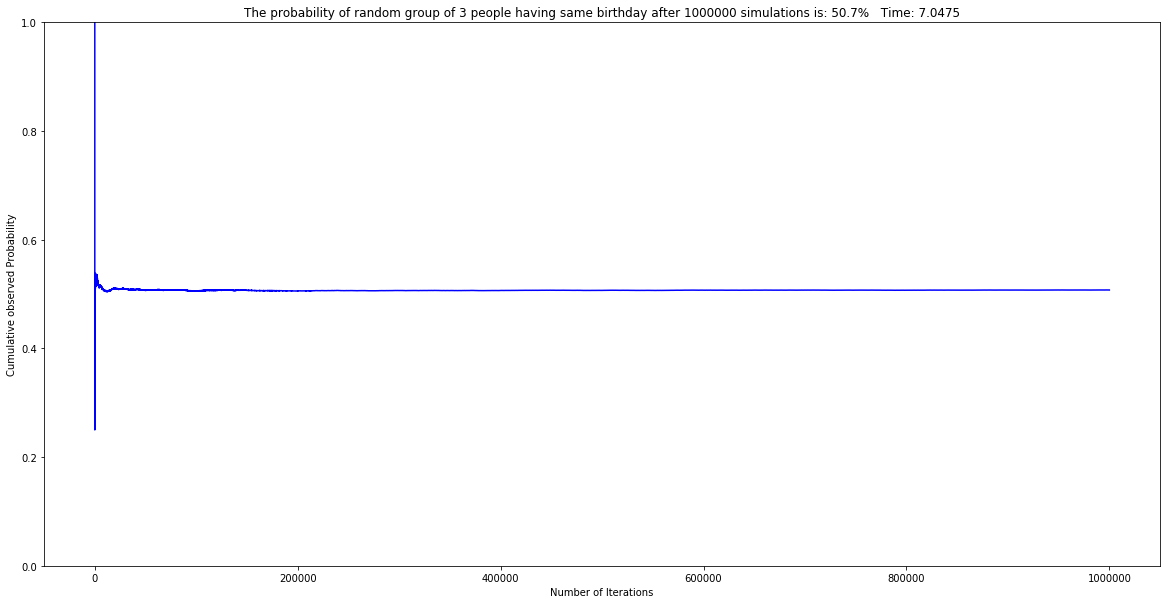

In [5]:
plot_time_simulation(1000000)

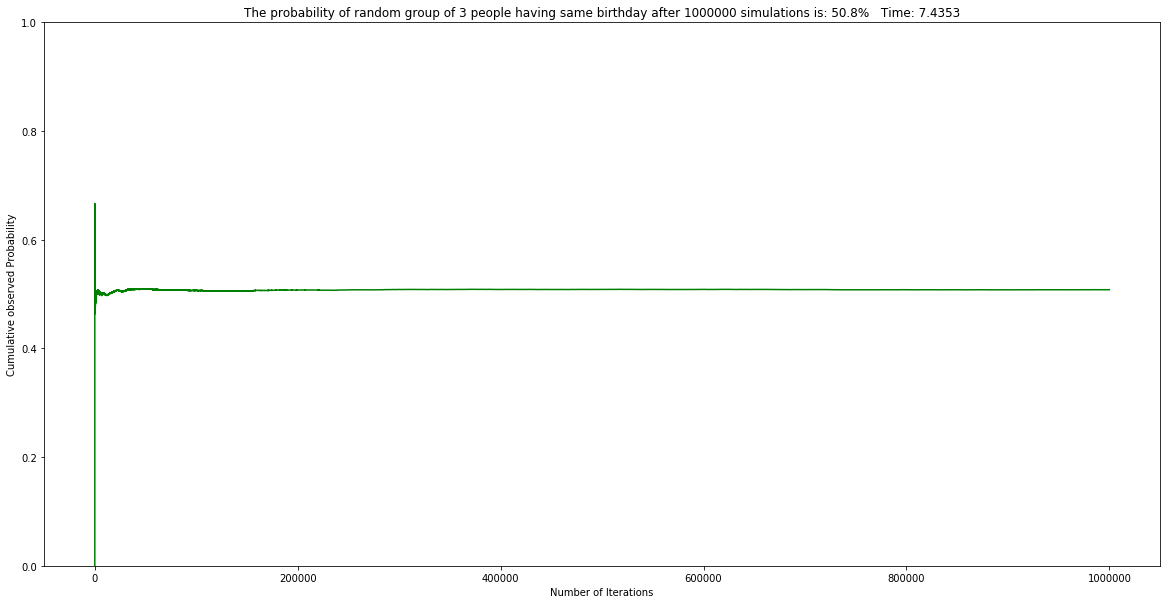

In [6]:
plot_time_simulation(1000000,23,'Orig','green')

There is not significant improvment in timing over orginal code.

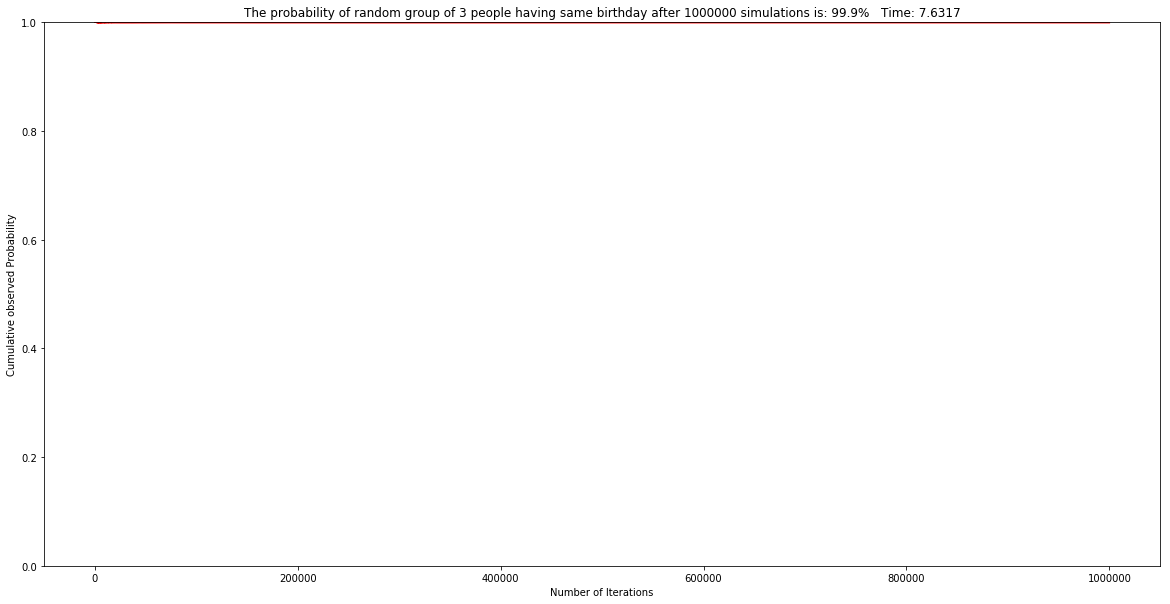

In [7]:
plot_time_simulation(1000000,70,'Numpy','Red')

As per origianl problme statemnt 70 people have 99.9% chance of two people having the same birthday